In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [131]:
df=pd.read_csv('breast-cancer.csv')

In [132]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [133]:
df.shape

(569, 32)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [135]:
df.isnull().values.any()

False

In [136]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

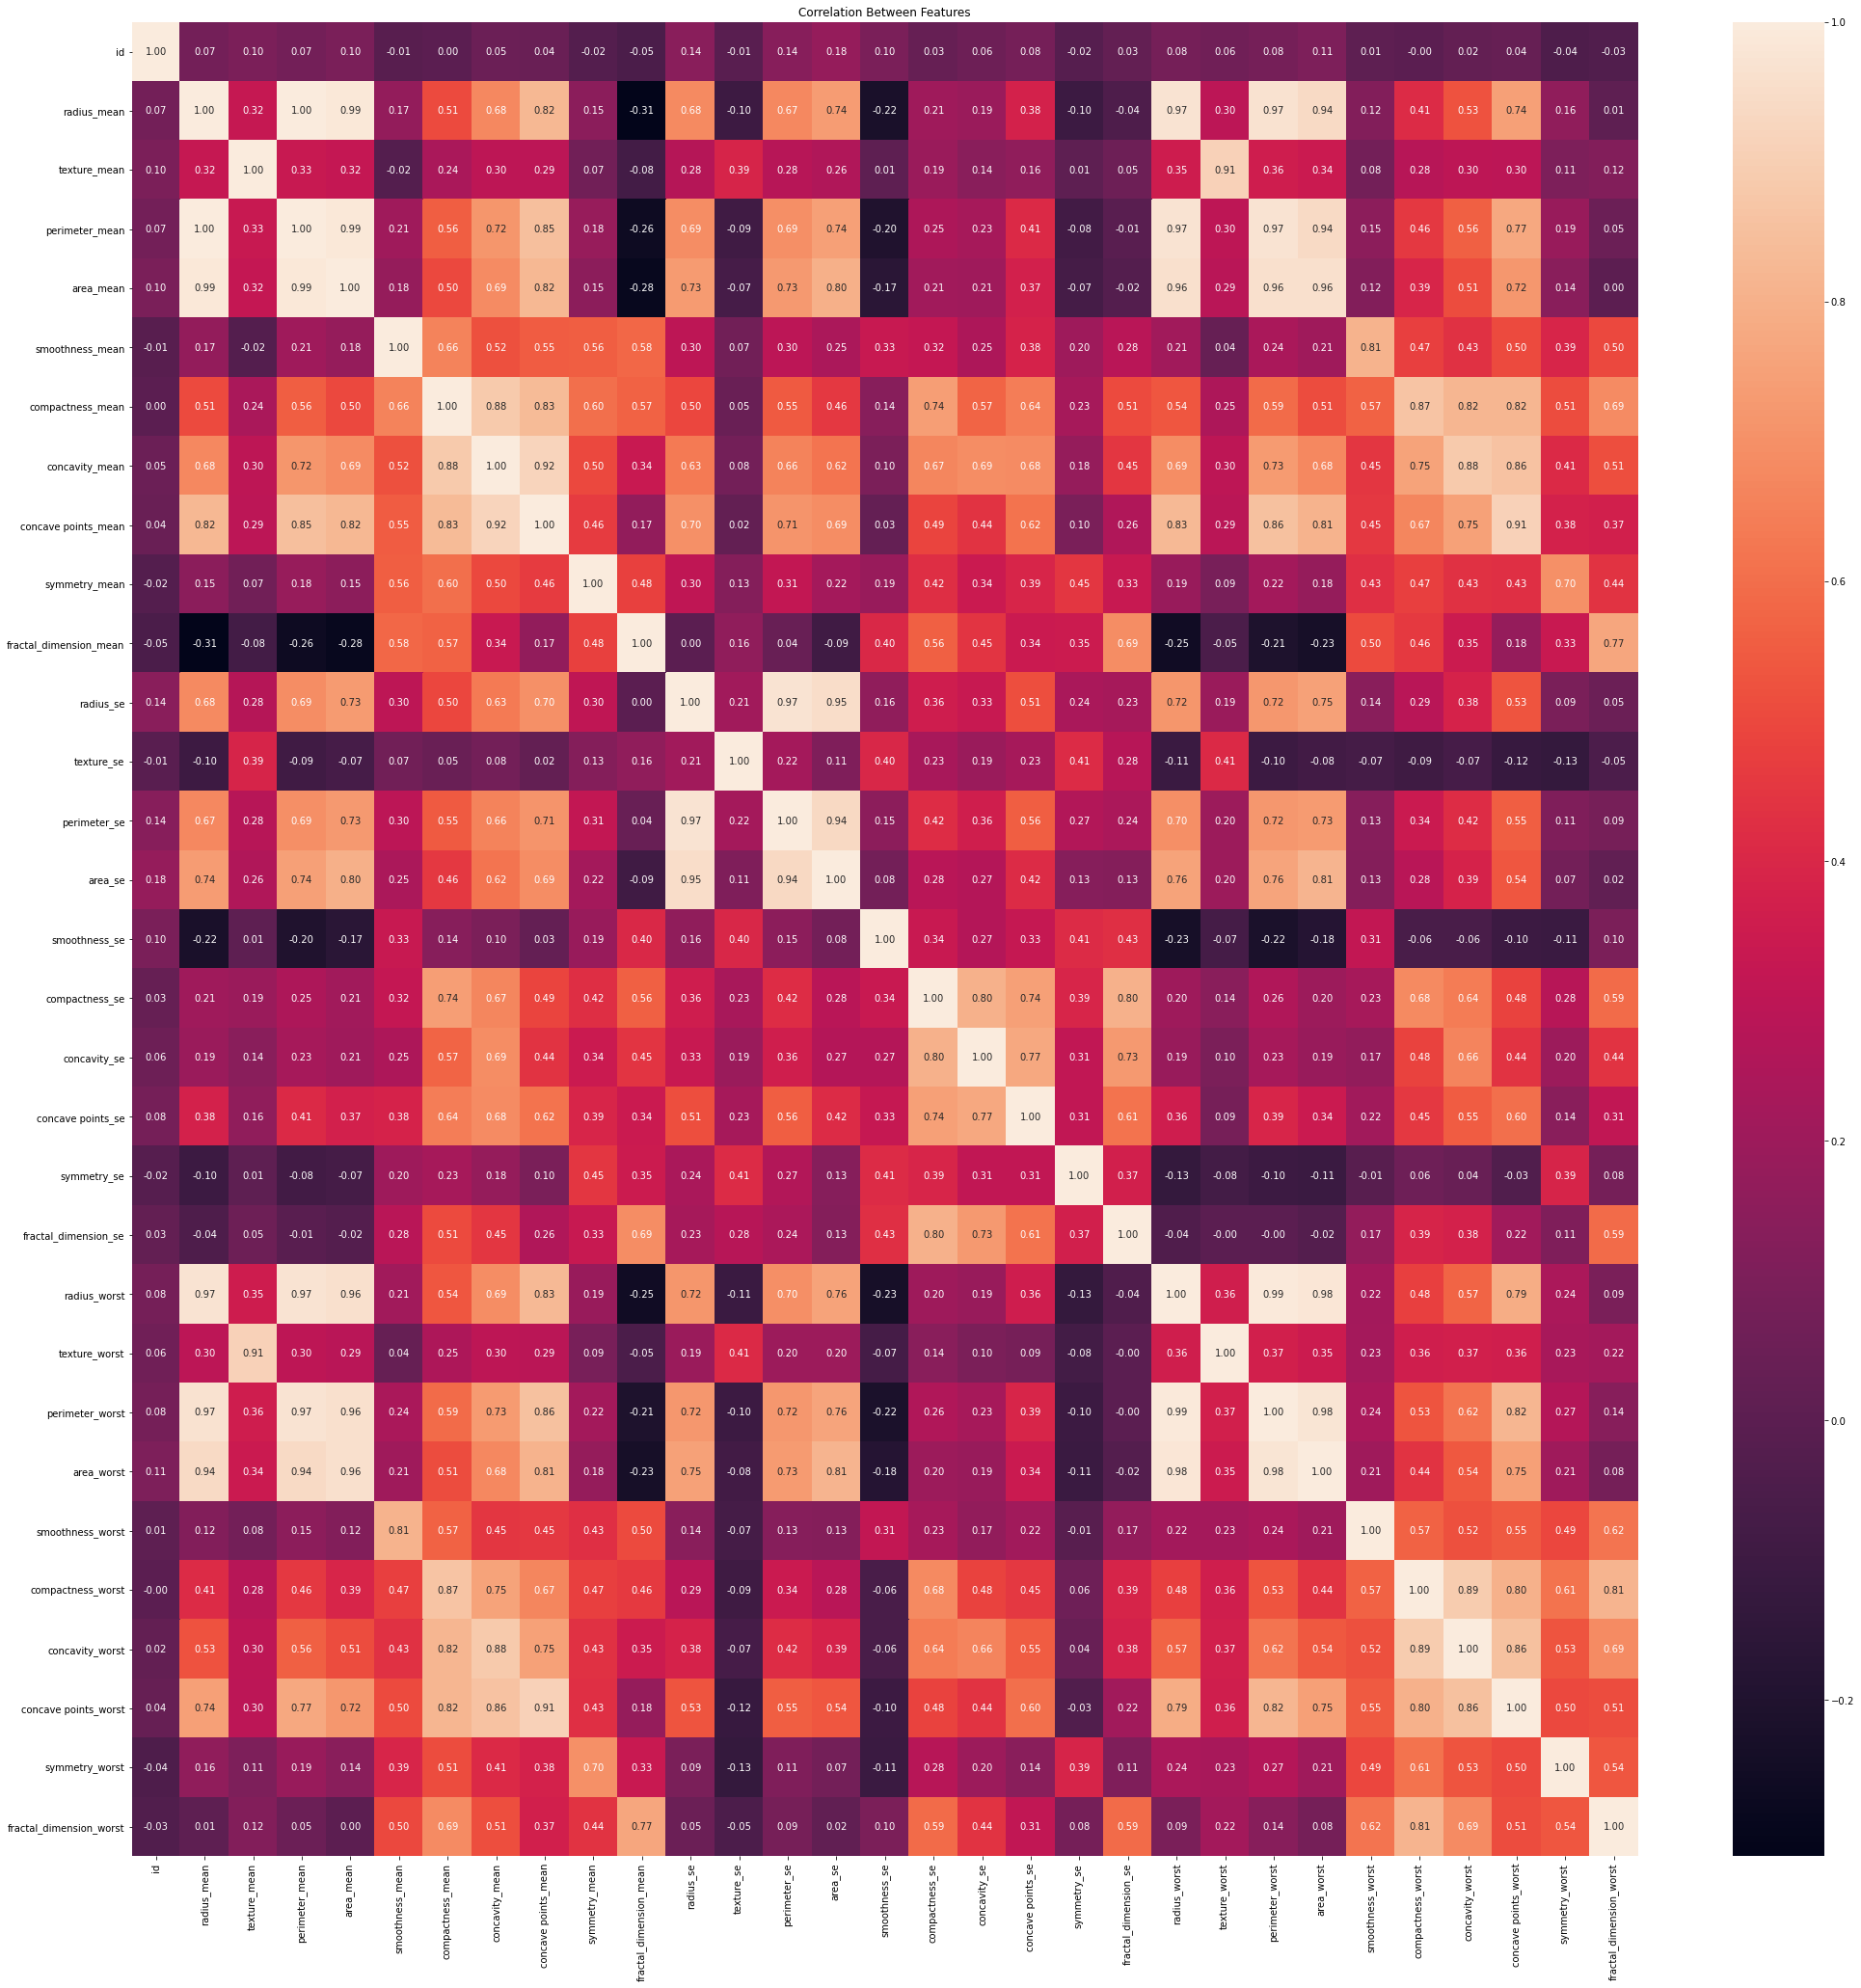

In [137]:
# Correlation
corr_matrix = df.corr()
plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

plt.title("Correlation Between Features")
plt.show()


In [138]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Label Encoding

In [139]:
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values) 

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [140]:
x = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [142]:
scal=StandardScaler()
x_train=scal.fit_transform(x_train)
x_test=scal.transform(x_test)

In [143]:
x_train

array([[ 0.35581987, -1.72664707,  0.41303118, ...,  1.05652305,
         0.51844283,  0.98925483],
       [-0.37326674,  0.50881308, -0.39469992, ..., -0.89667412,
        -0.63236707, -0.11469617],
       [ 1.4033581 , -0.15144941,  1.34799923, ...,  1.46353548,
         1.02587412, -0.03369823],
       ...,
       [ 0.02898794, -0.56411347, -0.0829084 , ..., -1.2463348 ,
        -0.67979055, -1.26509354],
       [-0.05760855,  0.09614902, -0.04957475, ...,  1.05652305,
         0.45995387,  1.24414347],
       [-0.5604269 ,  0.30837625, -0.61462066, ..., -0.6145405 ,
        -0.30672581, -0.8357478 ]])

Logistics Regression

In [144]:
# Build a Logistic Regression Classifier
classifier = LogisticRegression().fit(x_train, y_train)

m1 = classifier.predict(x_test)

[[118   3]
 [  1  66]]


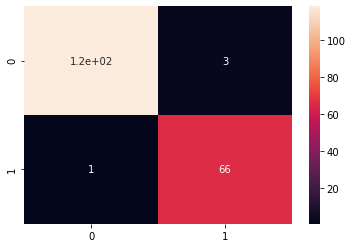

In [145]:
cm1 = confusion_matrix(y_test, m1)
print(cm1)

sns.heatmap(cm1, annot=True);

In [146]:
print(accuracy_score(y_test, m1))

0.9787234042553191


In [147]:
predict = cross_val_predict(estimator = classifier, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       236
           1       0.99      0.95      0.97       145

    accuracy                           0.98       381
   macro avg       0.98      0.97      0.97       381
weighted avg       0.98      0.98      0.98       381



 K Nearest Neighbours Classifier 

In [148]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

m2 = knn.predict(x_test)

Confusion Matrix:  [[118   3]
 [  6  61]]


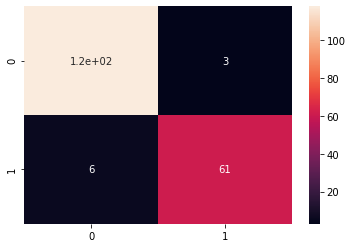

In [149]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cm2)

sns.heatmap(cm2, annot=True);

In [150]:
print(accuracy_score(y_test, m2))

0.9574468085106383


In [151]:
predict = cross_val_predict(estimator = knn, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       236
           1       0.98      0.90      0.94       145

    accuracy                           0.96       381
   macro avg       0.96      0.95      0.95       381
weighted avg       0.96      0.96      0.96       381



Random Forest Classifier 

In [152]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(x_train, y_train)

m3 = random_forest.predict(x_test)

Confusion Matrix:  [[118   3]
 [  6  61]]


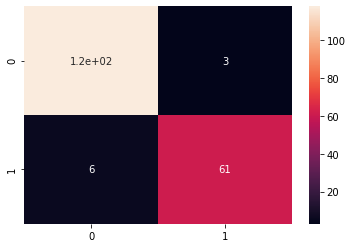

In [153]:
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cm3)

sns.heatmap(cm3, annot=True);

In [154]:
print(accuracy_score(y_test, m3))

0.9521276595744681


In [155]:
predict = cross_val_predict(estimator = knn, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       236
           1       0.98      0.90      0.94       145

    accuracy                           0.96       381
   macro avg       0.96      0.95      0.95       381
weighted avg       0.96      0.96      0.96       381

